In [5]:
import sys
from pathlib import Path
sys.path.insert(0, '/scratch/imb/Xiao/STimage')
from stimage._utils import Read10X, QC_plot
import shutil
import pandas as pd

sample,Visium_folder,count_matrix_h5_file,histology_image

In [2]:
BASE_PATH = Path("/scratch/imb/Xiao/DATA/RAW/Kidney_visium")
OUT_PATH = Path("/scratch/imb/Xiao/DATA/DATASET/Kidney_visium")
OUT_PATH.mkdir(exist_ok=True, parents=True)

VLP12_C


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


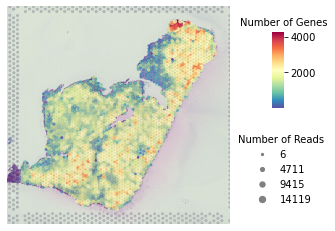

(15548, 16291, 3)
VLP14_C


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


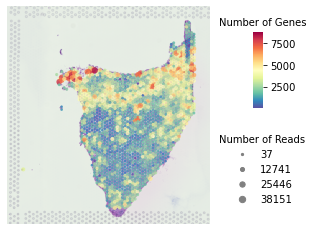

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(14336, 14521, 3)
VLP12_D


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


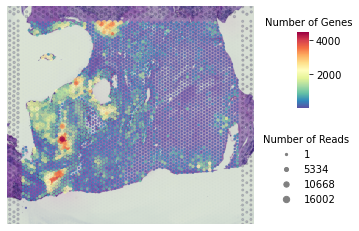

(15780, 15912, 3)
VLP12_A


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


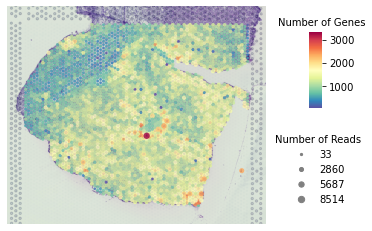

(14203, 14348, 3)
VLP12_B


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


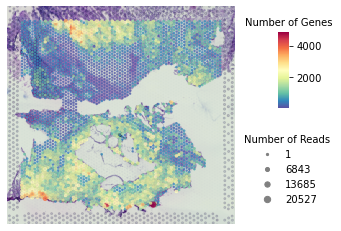

(15776, 15919, 3)
VLP14_D


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


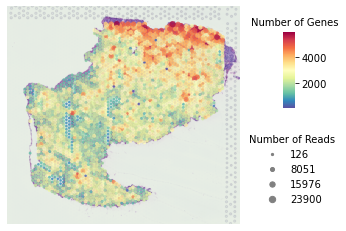

(14767, 15107, 3)


In [6]:
df = pd.DataFrame()
for sample_path in BASE_PATH.glob("./*"):
    sample = sample_path.stem
    print(sample)
    Visium_folder = sample_path
    count_matrix_h5_file = "filtered_feature_bc_matrix.h5"
    histology_image = BASE_PATH / sample / "image.tif"
    adata = Read10X(path=Visium_folder,
                                count_file=count_matrix_h5_file,
                                library_id=sample,
                                source_image_path=histology_image,
                                quality="fulres")
    QC_plot(adata, image_scale=10)
    print(adata.uns["spatial"][sample]['images']["fulres"].shape)
    df = df.append(pd.Series({"sample": sample, 
                              "Visium_folder": Visium_folder, 
                              "count_matrix_h5_file": count_matrix_h5_file, 
                              "histology_image": histology_image}), ignore_index=True)

In [7]:
df

,sample,Visium_folder,count_matrix_h5_file,histology_image
0,VLP12_C,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12_C,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12...
1,VLP14_C,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP14_C,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP14...
2,VLP12_D,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12_D,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12...
3,VLP12_A,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12_A,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12...
4,VLP12_B,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12_B,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP12...
5,VLP14_D,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP14_D,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Kidney_visium/VLP14...


In [8]:
df.to_csv(OUT_PATH / "dataset_6kidney.csv")